# Regresión lineal: práctica y ejercicios

**NOTAS**
 - Hay muchas formas de resolver cada problema, encuentra la tuya.
 - Crea las celdas extra que necesites.
 - Recuerda que una celda puede ser de tipo Código, o de tipo Markdown. Utiliza las segundas para escribir texto y explicaciones si lo precisas.
 - Intenta crear variables a la hora de resolver los ejercicios.
 - Puedes apoyarte en internet: todos los programadores lo hacemos a diario.

Importamos el dataset *california housing*

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

Para nuestro ejercicio de hoy, vamos a eliminar algunos datos de entrada

In [3]:
df = df[df.MedHouseVal < 5]

**El objetivo del ejercicio será predecir `MedHouseVal` en función de otras variables**

**La métrica a optimizar será el root mean squared error (RMSE)**

## Exploración de datos

In [4]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Cada fila es un bloque de casas de California

In [5]:
df.shape

(19648, 9)

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Explora el dataset como consideres, acompañándo el análisis de plots univariantes / bivariantes

Presta especial atención a las variables `MedInc`, `HouseAge`, `AveRooms` y `MedHouseVal`

In [8]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 2]

<Axes: xlabel='MedHouseVal', ylabel='Count'>

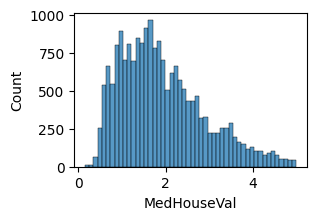

In [11]:
sns.histplot(df.MedHouseVal)

<Axes: xlabel='HouseAge', ylabel='Count'>

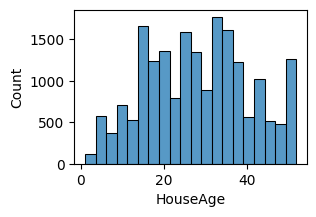

In [13]:
sns.histplot(df.HouseAge, bins=20)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

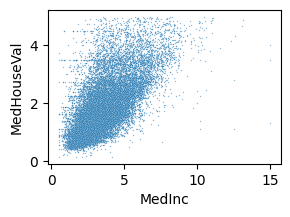

In [23]:
sns.scatterplot(x=df.MedInc, y=df.MedHouseVal, alpha=0.5, s=1)

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

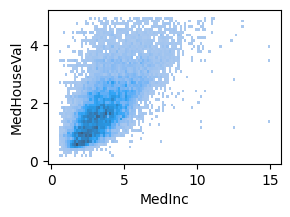

In [28]:
sns.histplot(x=df.MedInc, y=df.MedHouseVal)

In [25]:
import matplotlib.pyplot as plt

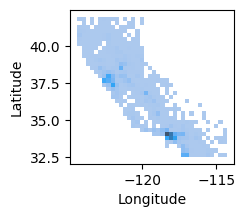

In [30]:
sns.histplot(x=df.Longitude, y=df.Latitude)
plt.gca().set_aspect('equal')

In [33]:
df.corr().style.background_gradient(cmap='Reds', vmin=-1, vmax=0.7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.195542,0.325739,-0.065418,0.042576,0.026172,-0.078135,-0.008992,0.646719
HouseAge,-0.195542,1.000000,-0.180816,-0.084755,-0.294911,0.015001,0.006083,-0.101740,0.065139
AveRooms,0.325739,-0.180816,1.000000,0.842641,-0.068886,-0.005278,0.121036,-0.029497,0.111581
AveBedrms,-0.065418,-0.084755,0.842641,1.000000,-0.069265,-0.006593,0.073421,0.013105,-0.061480
Population,0.042576,-0.294911,-0.068886,-0.069265,1.000000,0.070084,-0.113457,0.100989,0.013592
AveOccup,0.026172,0.015001,-0.005278,-0.006593,0.070084,1.000000,0.001915,0.002331,-0.021205
Latitude,-0.078135,0.006083,0.121036,0.073421,-0.113457,0.001915,1.000000,-0.924139,-0.149257
Longitude,-0.008992,-0.101740,-0.029497,0.013105,0.100989,0.002331,-0.924139,1.000000,-0.045733
MedHouseVal,0.646719,0.065139,0.111581,-0.061480,0.013592,-0.021205,-0.149257,-0.045733,1.000000


## Modelos predictivos

### Monta un modelo dummy

In [42]:
df.MedHouseVal.mean().round(2)

1.92

In [62]:
rmse_dummy = (((df.MedHouseVal - 1.92) ** 2).mean() ** 0.5).round(3)

In [63]:
rmse_dummy

0.971

### Monta un modelo con un solo predictor: `HouseAge`

Y evalúa su performance

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(
    X=df[["HouseAge"]],
    y=df.MedHouseVal
)

LinearRegression()

In [ ]:
lr.score

In [51]:
lr.predict(df[["HouseAge"]])

array([1.98443196, 1.88325352, 2.04008011, ..., 1.86301783, 1.86807675,
       1.85795891])

In [48]:
df2 = df[["HouseAge", "MedHouseVal"]].copy()

In [53]:
df2["predH"] = lr.predict(df[["HouseAge"]])

In [55]:
df2["error_sq"] = (df2.MedHouseVal - df2.predH) ** 2

In [56]:
df2.head()

,HouseAge,MedHouseVal,predH,error_sq
0,41.0,4.526,1.984432,6.459568
1,21.0,3.585,1.883254,2.895941
2,52.0,3.521,2.040080,2.193124
3,52.0,3.413,2.040080,1.884909
4,52.0,3.422,2.040080,1.909703


In [64]:
rmse = df2.error_sq.mean() ** 0.5

In [65]:
rmse

0.9690214507151682

### Monta un modelo con un solo predictor: `MedInc`

Y evalúa su performance

In [66]:
lr = LinearRegression()

In [67]:
lr.fit(
    X=df[["MedInc"]],
    y=df.MedHouseVal
)

LinearRegression()

In [68]:
df3 = df[["MedInc", "MedHouseVal"]].copy()

In [70]:
df3["predM"] = lr.predict(df[["MedInc"]])

In [71]:
df3.head()

,MedInc,MedHouseVal,predM
0,8.3252,4.526,3.779459
1,8.3014,3.585,3.769942
2,7.2574,3.521,3.352479
3,5.6431,3.413,2.706971
4,3.8462,3.422,1.988447


In [73]:
df3["error_sq"] = (df3.MedHouseVal - df3.predM) ** 2

In [74]:
df3.head()

,MedInc,MedHouseVal,predM,error_sq
0,8.3252,4.526,3.779459,0.557323
1,8.3014,3.585,3.769942,0.034204
2,7.2574,3.521,3.352479,0.028399
3,5.6431,3.413,2.706971,0.498477
4,3.8462,3.422,1.988447,2.055075


In [75]:
rmse = df3.error_sq.mean() ** 0.5

In [76]:
rmse

0.7406728211387401

In [78]:
lr.predict([[7.0]]).round(2)

/home/sheriff/.devpy/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.25])

<Axes: xlabel='MedHouseVal', ylabel='predM'>

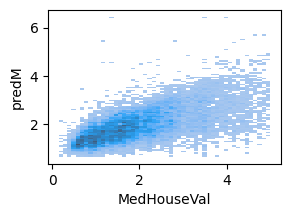

In [80]:
sns.histplot(x=df3.MedHouseVal, y=df3.predM)

### Monta un modelo con los 3 predictores `MedInc`, `HouseAge`, `AveRooms`

Y evalúa su performance

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(
    X=df[["MedInc", "HouseAge", "AveRooms"]],
    y=df.MedHouseVal
)

LinearRegression()

In [83]:
df4 = df[["MedInc", "HouseAge", "AveRooms", "MedHouseVal"]].copy()

In [85]:
df4["predT"] = lr.predict(df[["MedInc", "HouseAge", "AveRooms"]])

In [86]:
df4.head()

,MedInc,HouseAge,AveRooms,MedHouseVal,predT
0,8.3252,41.0,6.984127,4.526,4.092082
1,8.3014,21.0,6.238137,3.585,3.815662
2,7.2574,52.0,8.288136,3.521,3.735900
3,5.6431,52.0,5.817352,3.413,3.115654
4,3.8462,52.0,6.281853,3.422,2.308025


In [88]:
df4["error_sq"] = (df4.MedHouseVal - df4.predT) ** 2

In [89]:
rmse = df4.error_sq.mean() ** 0.5

In [90]:
rmse

0.7116534250822946

### Monta un modelo con todas las variables como predictoras

Y evalúa su performance

In [91]:
lr = LinearRegression()

In [107]:
df["income_per_year"] = df.MedInc / df.HouseAge

/tmp/ipykernel_55161/3163160643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income_per_year"] = df.MedInc / df.HouseAge


In [109]:
lr.fit(
    X=df.drop("MedHouseVal", axis=1),
    y=df.MedHouseVal
)

LinearRegression()

In [110]:
df4["predAll"] = lr.predict(df.drop("MedHouseVal", axis=1))

In [111]:
df4.head()

,MedInc,HouseAge,AveRooms,MedHouseVal,predT,error_sq,predAll,error_sqAll
0,8.3252,41.0,6.984127,4.526,4.092082,0.188285,4.018404,0.265946
1,8.3014,21.0,6.238137,3.585,3.815662,0.053205,3.914707,0.102063
2,7.2574,52.0,8.288136,3.521,3.735900,0.046182,3.545300,0.000493
3,5.6431,52.0,5.817352,3.413,3.115654,0.088414,3.117185,0.085904
4,3.8462,52.0,6.281853,3.422,2.308025,1.240940,2.294863,1.254874


In [112]:
df4["error_sqAll"] = (df4.MedHouseVal - df4.predAll) ** 2

In [113]:
rmse = df4.error_sqAll.mean() ** 0.5

In [114]:
rmse

0.633489791253639

In [104]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

En qué bloques de casas comete mayor error tu modelo?

In [118]:
only_preds = df4[["MedHouseVal", "predAll"]].copy()

In [120]:
only_preds["err"] = df4.MedHouseVal - df4.predAll

In [124]:
only_preds.sort_values("err").head(5)

,MedHouseVal,predAll,err
1979,1.625,7.494963,-5.869963
18501,1.313,6.968045,-5.655045
11912,1.125,5.466499,-4.341499
4492,1.125,4.763967,-3.638967
4548,0.675,4.032729,-3.357729


In [125]:
only_preds.sort_values("err").tail(5)

,MedHouseVal,predAll,err
4623,4.500,1.155923,3.344077
1633,4.750,1.284022,3.465978
12458,2.750,-0.758957,3.508957
1913,4.375,0.812245,3.562755
19542,4.500,0.875165,3.624835
